In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.style.use('seaborn')

## Questions that we want to answer through our analysis:
### 1. Yearly averages: Out of the four pollutants - SO2, NO2, ozone, and PM2.5
which have yearly average levels that regularly surpass the 
prescribed annual standards?
### 2. Daily standards: For the pollutants of concern, on how many days 
in each year are the daily standards exceeded?
### 3. Temporal variation: Which are the months where the pollution 
levels exceed critical levels on most days?

In [2]:
df = pd.read_csv('NSIT Dwarka.csv')
df.head()

,From Date,To Date,PM2.5,SO2,Ozone,NO2
0,01-01-2014 00:00,02-01-2014 00:00,None,22.7,8.63,5.59
1,02-01-2014 00:00,03-01-2014 00:00,None,8.72,8.43,3.68
2,03-01-2014 00:00,04-01-2014 00:00,None,13.83,9.77,3.83
3,04-01-2014 00:00,05-01-2014 00:00,None,27.64,6.83,9.64
4,05-01-2014 00:00,06-01-2014 00:00,None,37.17,7.34,11.06


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2192 entries, 0 to 2191
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   From Date  2191 non-null   object
 1   To Date    2191 non-null   object
 2   PM2.5      2191 non-null   object
 3   SO2        2187 non-null   object
 4   Ozone      2187 non-null   object
 5   NO2        2190 non-null   object
dtypes: object(6)
memory usage: 102.9+ KB


In [4]:
df.isna().sum()

From Date    1
To Date      1
PM2.5        1
SO2          5
Ozone        5
NO2          2
dtype: int64

In [5]:
df = df.replace({'None':np.nan})

In [6]:
df.isna().sum()

From Date      1
To Date        1
PM2.5        562
SO2           84
Ozone        106
NO2          105
dtype: int64

In [7]:
df.columns

Index(['From Date', 'To Date', 'PM2.5', 'SO2', 'Ozone', 'NO2'], dtype='object')

In [8]:
df[['From Date', 'To Date']] = df[['From Date', 'To Date']].apply(pd.to_datetime)
df[['PM2.5', 'SO2', 'Ozone', 'NO2']] = df[['PM2.5', 'SO2', 'Ozone', 'NO2']].apply(pd.to_numeric)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2192 entries, 0 to 2191
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   From Date  2191 non-null   datetime64[ns]
 1   To Date    2191 non-null   datetime64[ns]
 2   PM2.5      1630 non-null   float64       
 3   SO2        2108 non-null   float64       
 4   Ozone      2086 non-null   float64       
 5   NO2        2087 non-null   float64       
dtypes: datetime64[ns](2), float64(4)
memory usage: 102.9 KB


In [10]:
anual_std = 10

def above_std(x):
    if x > anual_std:
        return True
    else:
        return False

In [11]:
mask_1 = df[['PM2.5', 'SO2', 'Ozone', 'NO2']].applymap(above_std)

In [12]:
df[mask_1]

,From Date,To Date,PM2.5,SO2,Ozone,NO2
0,NaT,NaT,NaN,22.70,NaN,NaN
1,NaT,NaT,NaN,NaN,NaN,NaN
2,NaT,NaT,NaN,13.83,NaN,NaN
3,NaT,NaT,NaN,27.64,NaN,NaN
4,NaT,NaT,NaN,37.17,NaN,11.06
...,...,...,...,...,...,...
2187,NaT,NaT,254.75,14.25,NaN,31.21
2188,NaT,NaT,318.94,14.67,15.29,42.71
2189,NaT,NaT,263.01,16.88,NaN,46.10
2190,NaT,NaT,207.19,NaN,13.06,32.44


In [13]:
df.head()

,From Date,To Date,PM2.5,SO2,Ozone,NO2
0,2014-01-01,2014-02-01,NaN,22.70,8.63,5.59
1,2014-02-01,2014-03-01,NaN,8.72,8.43,3.68
2,2014-03-01,2014-04-01,NaN,13.83,9.77,3.83
3,2014-04-01,2014-05-01,NaN,27.64,6.83,9.64
4,2014-05-01,2014-06-01,NaN,37.17,7.34,11.06


In [14]:
df_pollutents = df.drop(columns=['To Date'],axis=1)

In [15]:
df_pollutents.set_index('From Date',inplace=True)

In [16]:
df_pollutents.head()

,PM2.5,SO2,Ozone,NO2
From Date,,,,
2014-01-01,NaN,22.70,8.63,5.59
2014-02-01,NaN,8.72,8.43,3.68
2014-03-01,NaN,13.83,9.77,3.83
2014-04-01,NaN,27.64,6.83,9.64
2014-05-01,NaN,37.17,7.34,11.06


In [17]:
df_pollutents['year'] = df_pollutents.index.year.values

In [18]:
df_pollutents.head()

,PM2.5,SO2,Ozone,NO2,year
From Date,,,,,
2014-01-01,NaN,22.70,8.63,5.59,2014.0
2014-02-01,NaN,8.72,8.43,3.68,2014.0
2014-03-01,NaN,13.83,9.77,3.83,2014.0
2014-04-01,NaN,27.64,6.83,9.64,2014.0
2014-05-01,NaN,37.17,7.34,11.06,2014.0


Text(-0.5, 38, 'Annual avg. standard for NO2')

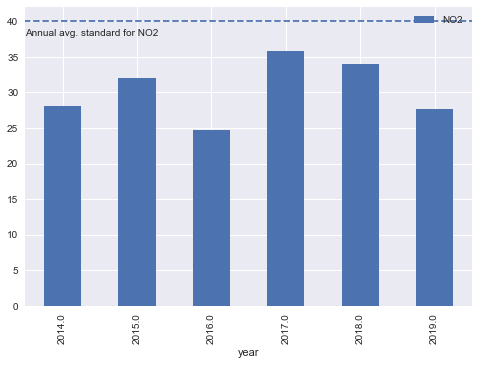

In [19]:
df_pollutents[['NO2','year']].groupby('year').mean().plot(kind='bar')
plt.hlines(40, -.9,15, linestyles="dashed")
plt.annotate('Annual avg. standard for NO2',(-0.5,38))


In [20]:
df_no2 = df_pollutents[['NO2','year']].groupby('year').mean()
df_so2 = df_pollutents[['SO2','year']].groupby('year').mean()
df_pm = df_pollutents[['PM2.5','year']].groupby('year').mean()
df_ozone = df_pollutents[['Ozone','year']].groupby('year').mean()

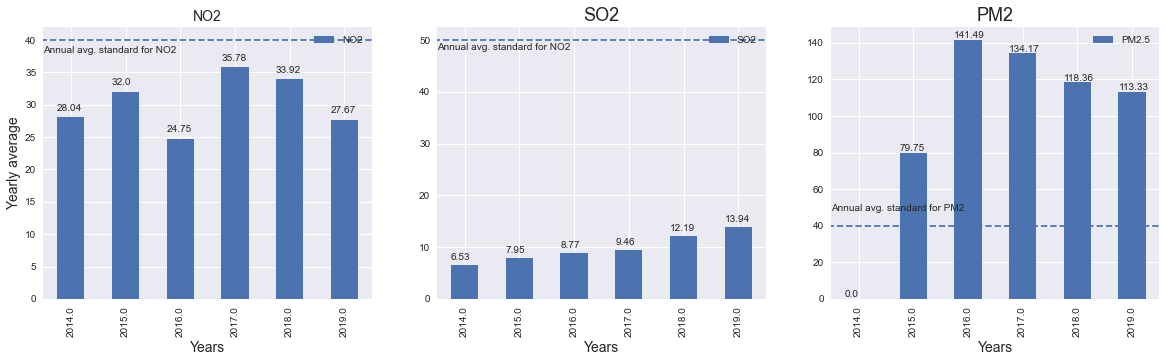

In [21]:
fig , (ax1,ax2,ax3) = plt.subplots(1,3)
df_no2.plot(kind='bar',figsize=(20,5),ax=ax1)

ax1.set_title("NO2", fontsize=14)
ax1.set_xlabel("Years", fontsize=14)
ax1.set_ylabel("Yearly average", fontsize=14)

#Creating a dashed line to indicate the annual standard
ax1.hlines(40, -.9,15, linestyles="dashed")
#Labelling this dashed line
ax1.annotate('Annual avg. standard for NO2',(-0.5,38))

for bar in ax1.patches:
    yval = round(bar.get_height(),2)
    ax1.text(bar.get_x(), yval+1, yval)
    

df_so2.plot(kind='bar',figsize=(20,5),ax=ax2)

ax2.set_title("SO2", fontsize=18)
ax2.set_xlabel("Years", fontsize=14)

#Creating a dashed line to indicate the annual standard
ax2.hlines(50, -.9,15, linestyles="dashed")
#Labelling this dashed line
ax2.annotate('Annual avg. standard for NO2',(-0.5,48))

for bar in ax2.patches:
    yval = round(bar.get_height(),2)
    ax2.text(bar.get_x(), yval+1, yval)
    
df_pm.plot(kind='bar',figsize=(20,5),ax=ax3)

ax3.set_title("PM2", fontsize=18)
ax3.set_xlabel("Years", fontsize=14)

#Creating a dashed line to indicate the annual standard
ax3.hlines(40, -.9,15, linestyles="dashed")
#Labelling this dashed line
ax3.annotate('Annual avg. standard for PM2',(-0.5,48))

for bar in ax3.patches:
    yval = round(bar.get_height(),2)
    ax3.text(bar.get_x(), yval+1, yval)

In [22]:
df_pollutents.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2192 entries, 2014-01-01 to NaT
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PM2.5   1630 non-null   float64
 1   SO2     2108 non-null   float64
 2   Ozone   2086 non-null   float64
 3   NO2     2087 non-null   float64
 4   year    2191 non-null   float64
dtypes: float64(5)
memory usage: 102.8 KB


<AxesSubplot:xlabel='year'>

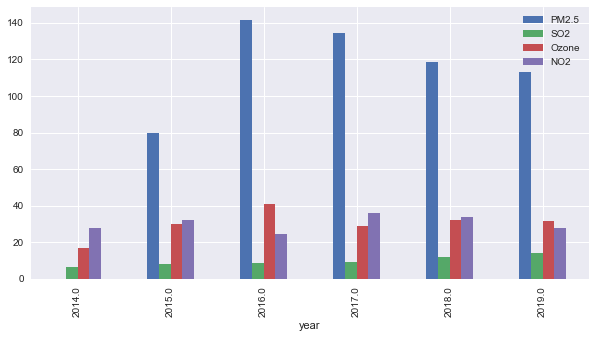

In [23]:
df_pollutents.groupby("year").mean().plot(kind='bar',figsize=(10,5))


### Part 2 of air quality analysis: Plotting the number of days in each year where 24-hourly standards are exceeded for PM2.5 and NO2

In [24]:
df_pollutents2016 = df_pollutents[df_pollutents['year']==2016]
df_pollutents2017 = df_pollutents[df_pollutents['year']==2017]
df_pollutents2018 = df_pollutents[df_pollutents['year']==2018]
df_pollutents2019 = df_pollutents[df_pollutents['year']==2019]

In [25]:
#2016
a2=df_pollutents2016 [(df_pollutents2016 ['PM2.5']<=60)]['PM2.5'].count()
b2=df_pollutents2016 [((df_pollutents2016 ['PM2.5']>60) & (df_pollutents2016['PM2.5']<=120))]['PM2.5'].count()
c2=df_pollutents2016 [((df_pollutents2016 ['PM2.5']>120) & (df_pollutents2016['PM2.5']<=180))]['PM2.5'].count()
d2=df_pollutents2016 [(df_pollutents2016 ['PM2.5']>180)]['PM2.5'].count()

dfpb2016 = pd.DataFrame({'year':'2016',
                         'pm levels':['<60','between 61 and 120','between 121 and 180','greater than 180'],
                         'number of critical days':[a2,b2,c2,d2]})

#2017
a3=df_pollutents2017 [(df_pollutents2017 ['PM2.5']<=60)]['PM2.5'].count()
b3=df_pollutents2017 [((df_pollutents2017 ['PM2.5']>60) & (df_pollutents2017['PM2.5']<=120))]['PM2.5'].count()
c3=df_pollutents2017 [((df_pollutents2017 ['PM2.5']>120) & (df_pollutents2017['PM2.5']<=180))]['PM2.5'].count()
d3=df_pollutents2017 [(df_pollutents2017 ['PM2.5']>180)]['PM2.5'].count()

dfpb2017 = pd.DataFrame({'year':'2017',
                         'pm levels':['<60','between 61 and 120','between 121 and 180','greater than 180'],
                         'number of critical days':[a3,b3,c3,d3]})

#2018
a4=df_pollutents2018 [(df_pollutents2018 ['PM2.5']<=60)]['PM2.5'].count()
b4=df_pollutents2018 [((df_pollutents2018 ['PM2.5']>60) & (df_pollutents2018['PM2.5']<=120))]['PM2.5'].count()
c4=df_pollutents2018 [((df_pollutents2018 ['PM2.5']>120) & (df_pollutents2018['PM2.5']<=180))]['PM2.5'].count()
d4=df_pollutents2018 [(df_pollutents2018 ['PM2.5']>180)]['PM2.5'].count()

dfpb2018 = pd.DataFrame({'year':'2018',
                         'pm levels':['<60','between 61 and 120','between 121 and 180','greater than 180'],
                         'number of critical days':[a4,b4,c4,d4]})

#2019
a5=df_pollutents2019 [(df_pollutents2019 ['PM2.5']<=60)]['PM2.5'].count()
b5=df_pollutents2019 [((df_pollutents2019 ['PM2.5']>60) & (df_pollutents2019['PM2.5']<=120))]['PM2.5'].count()
c5=df_pollutents2019 [((df_pollutents2019 ['PM2.5']>120) & (df_pollutents2019['PM2.5']<=180))]['PM2.5'].count()
d5=df_pollutents2019 [(df_pollutents2019 ['PM2.5']>180)]['PM2.5'].count()

dfpb2019 = pd.DataFrame({'year':'2019',
                         'pm levels':['<60','between 61 and 120','between 121 and 180','greater than 180'],
                         'number of critical days':[a5,b5,c5,d5]})



In [26]:
dfpb2016

,year,pm levels,number of critical days
0,2016,<60,39
1,2016,between 61 and 120,121
2,2016,between 121 and 180,100
3,2016,greater than 180,63


In [27]:
dfpivot2016=dfpb2016.pivot(index='year',columns='pm levels',values='number of critical days')
dfpivot2017=dfpb2017.pivot(index='year',columns='pm levels',values='number of critical days')
dfpivot2018=dfpb2018.pivot(index='year',columns='pm levels',values='number of critical days')
dfpivot2019=dfpb2019.pivot(index='year',columns='pm levels',values='number of critical days')

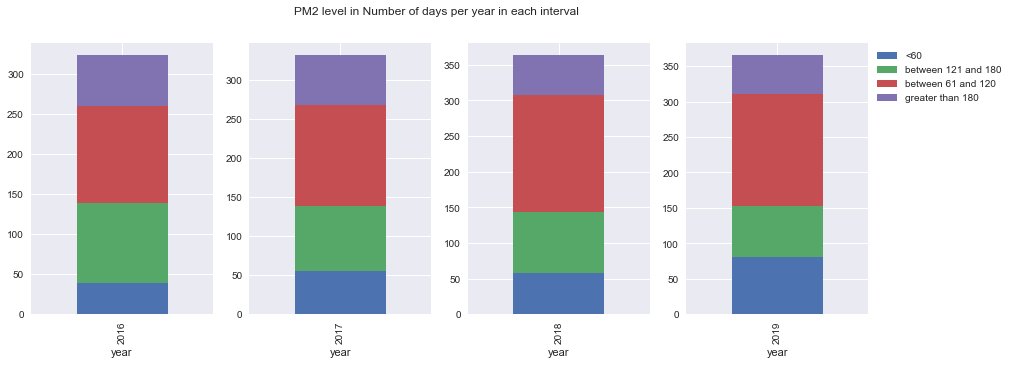

In [28]:
fig, (ax1,ax2,ax3,ax4) =  plt.subplots(1,4,figsize=(15,5))
fig.suptitle("PM2 level in Number of days per year in each interval")

dfpivot2016.plot.bar(stacked=True,ax=ax1)
dfpivot2017.plot.bar(stacked=True,ax=ax2)
dfpivot2018.plot.bar(stacked=True,ax=ax3)
dfpivot2019.plot.bar(stacked=True,ax=ax4)

ax1.legend().set_visible(False)
ax2.legend().set_visible(False)
ax3.legend().set_visible(False)
ax4.legend(loc=0,bbox_to_anchor=(1,1))

- Same method for NO2 

In [29]:
a = df_pollutents2016[df_pollutents2016['NO2'] >= 80]['NO2'].count()
b = df_pollutents2017[df_pollutents2017['NO2'] >= 80]['NO2'].count()
c = df_pollutents2018[df_pollutents2018['NO2'] >= 80]['NO2'].count()
d = df_pollutents2019[df_pollutents2019['NO2'] >= 80]['NO2'].count()

dfno2 = pd.DataFrame({'year':[2016,2017,2018,2019],
                      'days no2>80':[a,b,c,d]})

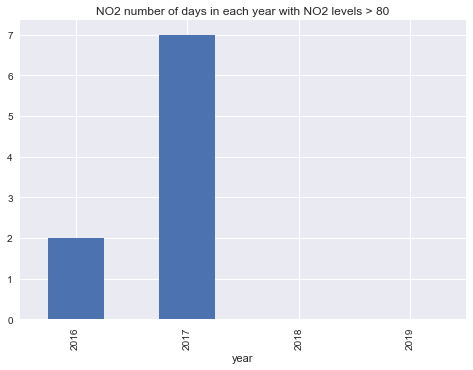

In [30]:
ax = dfno2.plot(kind='bar',x='year',y='days no2>80')
ax.set_title("NO2 number of days in each year with NO2 levels > 80")
ax.legend().set_visible(False)

## 3. Temporal variation: Which are the months where the pollution levels exceed critical levels on most days?

- To do this, for each of the twelve months, we capture the number of critical air pollution days every year with 24-hourly PM2.5 values exceeding 180 μg/m3
.


In [31]:
df_pollutents.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2192 entries, 2014-01-01 to NaT
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PM2.5   1630 non-null   float64
 1   SO2     2108 non-null   float64
 2   Ozone   2086 non-null   float64
 3   NO2     2087 non-null   float64
 4   year    2191 non-null   float64
dtypes: float64(5)
memory usage: 102.8 KB


In [38]:
df_3 = df_pollutents.drop(['SO2','Ozone','NO2'],axis=1)

In [47]:
df_3['month'] = df_3.index.month.values.astype('int')

In [65]:
df_3['above_level'] = (df_3['PM2.5'] >= 180)

In [70]:
df_3['above_level'] = df_3['above_level'].replace({False:np.nan})

In [94]:
sec1 = df_3[df_3['year'] == 2016.0].groupby('month')['above_level'].count()
sec2 = df_3[df_3['year'] == 2017.0].groupby('month')['above_level'].count()
sec3 = df_3[df_3['year'] == 2018.0].groupby('month')['above_level'].count()
sec4 = df_3[df_3['year'] == 2019.0].groupby('month')['above_level'].count()


selectionc=pd.concat([sec1,sec2,sec3,sec4],axis=1)
#renaming the columns
selectionc.columns=['2016','2017','2018','2019']
selectionc

,2016,2017,2018,2019
month,,,,
1,18,4,12,9
2,3,1,3,3
3,1,6,1,2
4,5,2,1,2
5,4,3,2,4
6,10,6,4,1
7,5,1,1,2
8,3,2,3,1
9,2,2,3,0


<AxesSubplot:ylabel='month'>

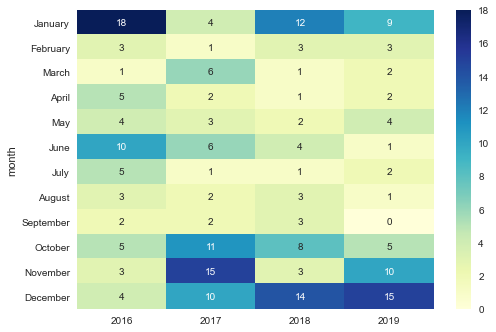

In [110]:
sns.heatmap(data=selectionc,fmt='d',annot=True,cmap='YlGnBu')

In [104]:
months= {1:'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June',7:'July', 8:'August', 
         9:'September', 10:'October', 11:'November', 12:'December'}

In [108]:
selectionc.rename(months, axis=0,inplace=True)

In [109]:
selectionc

,2016,2017,2018,2019
month,,,,
January,18,4,12,9
February,3,1,3,3
March,1,6,1,2
April,5,2,1,2
May,4,3,2,4
June,10,6,4,1
July,5,1,1,2
August,3,2,3,1
September,2,2,3,0
